# [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # Not in docs

# Object Creation

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,1.026381,0.244066,1.054936,0.312229
2013-01-02,1.300163,-0.229843,0.326137,0.706881
2013-01-03,-1.732802,0.571497,0.245804,0.916733
2013-01-04,-0.416179,-1.238027,0.388389,-0.491443
2013-01-05,-0.314805,-2.335417,-0.134617,-0.372719
2013-01-06,-0.721261,-0.794987,-0.813901,-0.183045


In [9]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
# df2.<TAB>

# Viewing Data

In [13]:
df.head()

,A,B,C,D
2013-01-01,1.026381,0.244066,1.054936,0.312229
2013-01-02,1.300163,-0.229843,0.326137,0.706881
2013-01-03,-1.732802,0.571497,0.245804,0.916733
2013-01-04,-0.416179,-1.238027,0.388389,-0.491443
2013-01-05,-0.314805,-2.335417,-0.134617,-0.372719


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.416179,-1.238027,0.388389,-0.491443
2013-01-05,-0.314805,-2.335417,-0.134617,-0.372719
2013-01-06,-0.721261,-0.794987,-0.813901,-0.183045


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 1.02638127,  0.24406557,  1.05493647,  0.31222948],
       [ 1.30016252, -0.22984261,  0.32613669,  0.70688142],
       [-1.73280151,  0.57149679,  0.24580418,  0.91673251],
       [-0.41617884, -1.23802694,  0.38838913, -0.49144343],
       [-0.31480516, -2.33541688, -0.13461683, -0.37271867],
       [-0.72126125, -0.79498725, -0.81390057, -0.18304475]])

In [18]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.143084,-0.630452,0.177792,0.148106
std,1.132799,1.065183,0.619906,0.586497
min,-1.732802,-2.335417,-0.813901,-0.491443
25%,-0.644991,-1.127267,-0.039512,-0.325300
50%,-0.365492,-0.512415,0.285970,0.064592
75%,0.691085,0.125589,0.372826,0.608218
max,1.300163,0.571497,1.054936,0.916733


In [20]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.026381,1.300163,-1.732802,-0.416179,-0.314805,-0.721261
B,0.244066,-0.229843,0.571497,-1.238027,-2.335417,-0.794987
C,1.054936,0.326137,0.245804,0.388389,-0.134617,-0.813901
D,0.312229,0.706881,0.916733,-0.491443,-0.372719,-0.183045


In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.312229,1.054936,0.244066,1.026381
2013-01-02,0.706881,0.326137,-0.229843,1.300163
2013-01-03,0.916733,0.245804,0.571497,-1.732802
2013-01-04,-0.491443,0.388389,-1.238027,-0.416179
2013-01-05,-0.372719,-0.134617,-2.335417,-0.314805
2013-01-06,-0.183045,-0.813901,-0.794987,-0.721261


In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.314805,-2.335417,-0.134617,-0.372719
2013-01-04,-0.416179,-1.238027,0.388389,-0.491443
2013-01-06,-0.721261,-0.794987,-0.813901,-0.183045
2013-01-02,1.300163,-0.229843,0.326137,0.706881
2013-01-01,1.026381,0.244066,1.054936,0.312229
2013-01-03,-1.732802,0.571497,0.245804,0.916733


# Selection

## Getting

In [23]:
df['A']

2013-01-01    1.026381
2013-01-02    1.300163
2013-01-03   -1.732802
2013-01-04   -0.416179
2013-01-05   -0.314805
2013-01-06   -0.721261
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,1.026381,0.244066,1.054936,0.312229
2013-01-02,1.300163,-0.229843,0.326137,0.706881
2013-01-03,-1.732802,0.571497,0.245804,0.916733


In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.300163,-0.229843,0.326137,0.706881
2013-01-03,-1.732802,0.571497,0.245804,0.916733
2013-01-04,-0.416179,-1.238027,0.388389,-0.491443


## Selection by Label

In [26]:
df.loc[dates[0]]

A    1.026381
B    0.244066
C    1.054936
D    0.312229
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.026381,0.244066
2013-01-02,1.300163,-0.229843
2013-01-03,-1.732802,0.571497
2013-01-04,-0.416179,-1.238027
2013-01-05,-0.314805,-2.335417
2013-01-06,-0.721261,-0.794987


In [28]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,1.300163,-0.229843
2013-01-03,-1.732802,0.571497
2013-01-04,-0.416179,-1.238027


In [29]:
df.loc['20130102', ['A', 'B']]

A    1.300163
B   -0.229843
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0], 'A']

1.0263812722480032

In [31]:
df.at[dates[0], 'A']

1.0263812722480032

## Selection by Position

In [32]:
df.iloc[3]

A   -0.416179
B   -1.238027
C    0.388389
D   -0.491443
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.416179,-1.238027
2013-01-05,-0.314805,-2.335417


In [34]:
df.iloc[[1, 2, 3], [0, 2]]

,A,C
2013-01-02,1.300163,0.326137
2013-01-03,-1.732802,0.245804
2013-01-04,-0.416179,0.388389


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.300163,-0.229843,0.326137,0.706881
2013-01-03,-1.732802,0.571497,0.245804,0.916733


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.244066,1.054936
2013-01-02,-0.229843,0.326137
2013-01-03,0.571497,0.245804
2013-01-04,-1.238027,0.388389
2013-01-05,-2.335417,-0.134617
2013-01-06,-0.794987,-0.813901


In [37]:
df.iloc[1, 1]

-0.22984261115812818

In [38]:
df.iat[1, 1]

-0.22984261115812818

## Boolean Indexing

In [39]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.026381,0.244066,1.054936,0.312229
2013-01-02,1.300163,-0.229843,0.326137,0.706881


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,1.026381,0.244066,1.054936,0.312229
2013-01-02,1.300163,NaN,0.326137,0.706881
2013-01-03,NaN,0.571497,0.245804,0.916733
2013-01-04,NaN,NaN,0.388389,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN


In [41]:
df2 = df.copy()

In [42]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,1.026381,0.244066,1.054936,0.312229,one
2013-01-02,1.300163,-0.229843,0.326137,0.706881,one
2013-01-03,-1.732802,0.571497,0.245804,0.916733,two
2013-01-04,-0.416179,-1.238027,0.388389,-0.491443,three
2013-01-05,-0.314805,-2.335417,-0.134617,-0.372719,four
2013-01-06,-0.721261,-0.794987,-0.813901,-0.183045,three


In [44]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.732802,0.571497,0.245804,0.916733,two
2013-01-05,-0.314805,-2.335417,-0.134617,-0.372719,four


## Setting

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df['F'] = s1

In [48]:
df.at[dates[0], 'A'] = 0

In [49]:
df.iat[0, 1] = 0

In [50]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.054936,5,NaN
2013-01-02,1.300163,-0.229843,0.326137,5,1.0
2013-01-03,-1.732802,0.571497,0.245804,5,2.0
2013-01-04,-0.416179,-1.238027,0.388389,5,3.0
2013-01-05,-0.314805,-2.335417,-0.134617,5,4.0
2013-01-06,-0.721261,-0.794987,-0.813901,5,5.0


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.054936,-5,NaN
2013-01-02,-1.300163,-0.229843,-0.326137,-5,-1.0
2013-01-03,-1.732802,-0.571497,-0.245804,-5,-2.0
2013-01-04,-0.416179,-1.238027,-0.388389,-5,-3.0
2013-01-05,-0.314805,-2.335417,-0.134617,-5,-4.0
2013-01-06,-0.721261,-0.794987,-0.813901,-5,-5.0


# Missing Data

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [56]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.054936,5,NaN,1.0
2013-01-02,1.300163,-0.229843,0.326137,5,1.0,1.0
2013-01-03,-1.732802,0.571497,0.245804,5,2.0,NaN
2013-01-04,-0.416179,-1.238027,0.388389,5,3.0,NaN


In [58]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.300163,-0.229843,0.326137,5,1.0,1.0


In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.054936,5,5.0,1.0
2013-01-02,1.300163,-0.229843,0.326137,5,1.0,1.0
2013-01-03,-1.732802,0.571497,0.245804,5,2.0,5.0
2013-01-04,-0.416179,-1.238027,0.388389,5,3.0,5.0


In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

In [61]:
df.mean()

A   -0.314147
B   -0.671129
C    0.177792
D    5.000000
F    3.000000
dtype: float64

In [62]:
df.mean(1)

2013-01-01    1.513734
2013-01-02    1.479291
2013-01-03    1.216900
2013-01-04    1.346837
2013-01-05    1.243032
2013-01-06    1.533970
Freq: D, dtype: float64

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.732802,-0.428503,-0.754196,4.0,1.0
2013-01-04,-3.416179,-4.238027,-2.611611,2.0,0.0
2013-01-05,-5.314805,-7.335417,-5.134617,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.054936,5,NaN
2013-01-02,1.300163,-0.229843,1.381073,10,1.0
2013-01-03,-0.432639,0.341654,1.626877,15,3.0
2013-01-04,-0.848818,-0.896373,2.015266,20,6.0
2013-01-05,-1.163623,-3.231790,1.880650,25,10.0
2013-01-06,-1.884884,-4.026777,1.066749,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    3.032964
B    2.906914
C    1.868837
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    2
1    6
2    0
3    5
4    6
5    6
6    1
7    3
8    0
9    1
dtype: int64

In [70]:
s.value_counts()

6    3
1    2
0    2
5    1
3    1
2    1
dtype: int64

## String Methods

In [71]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,0.328879,-0.426748,-1.375782,-0.974850
1,1.078606,1.399743,-1.035597,1.242951
2,-0.791880,-0.023225,-0.114154,1.191628
3,-1.997282,-1.533119,-1.043370,-1.520742
4,-0.250752,0.260493,1.185179,0.640873
5,0.700806,0.827821,0.666827,-1.012216
6,0.072083,-0.224212,-0.152815,1.158320
7,0.298009,0.512098,0.055142,0.353223
8,-0.621640,0.348835,0.577251,-0.703441
9,-0.951012,-0.312168,-1.018935,1.666229


In [75]:
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,0.328879,-0.426748,-1.375782,-0.974850
1,1.078606,1.399743,-1.035597,1.242951
2,-0.791880,-0.023225,-0.114154,1.191628
3,-1.997282,-1.533119,-1.043370,-1.520742
4,-0.250752,0.260493,1.185179,0.640873
5,0.700806,0.827821,0.666827,-1.012216
6,0.072083,-0.224212,-0.152815,1.158320
7,0.298009,0.512098,0.055142,0.353223
8,-0.621640,0.348835,0.577251,-0.703441
9,-0.951012,-0.312168,-1.018935,1.666229


## Join

In [77]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [78]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,bar,5


In [81]:
pd.merge(left, right, on='key') # Doesn't do what it says in tutorial

,key,lval,rval
0,foo,1,4
1,foo,2,4


In [82]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [83]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append

In [87]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [88]:
df

,A,B,C,D
0,-0.808385,0.147428,-0.097555,0.438927
1,-0.318295,0.802379,-0.953171,-1.179768
2,-0.785601,-0.730137,-0.265828,-0.339854
3,-0.765486,1.301775,-0.719341,-0.233434
4,-2.265541,-1.613829,-1.440108,1.533218
5,-1.221067,0.821753,-0.068145,-0.746878
6,0.020922,-0.548627,-1.471038,0.147314
7,-0.165738,0.731509,-1.078937,-0.344341


In [89]:
s = df.iloc[3]

In [90]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.808385,0.147428,-0.097555,0.438927
1,-0.318295,0.802379,-0.953171,-1.179768
2,-0.785601,-0.730137,-0.265828,-0.339854
3,-0.765486,1.301775,-0.719341,-0.233434
4,-2.265541,-1.613829,-1.440108,1.533218
5,-1.221067,0.821753,-0.068145,-0.746878
6,0.020922,-0.548627,-1.471038,0.147314
7,-0.165738,0.731509,-1.078937,-0.344341
8,-0.765486,1.301775,-0.719341,-0.233434


# Grouping

In [91]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [92]:
df

,A,B,C,D
0,foo,one,-1.394303,1.449923
1,bar,one,1.207057,0.975449
2,foo,two,0.827195,0.125430
3,bar,three,-0.955972,1.205076
4,foo,two,0.315444,1.068242
5,bar,two,-0.714619,1.654589
6,foo,one,-1.178616,0.376481
7,foo,three,-2.187333,0.208994


In [93]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.463535,3.835114
foo,-3.617612,3.229070


In [94]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.207057  0.975449
    three -0.955972  1.205076
    two   -0.714619  1.654589
foo one   -2.572919  1.826404
    three -2.187333  0.208994
    two    1.142639  1.193671

# Reshaping

## Stack

In [95]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [96]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [97]:
df = pd.DataFrame(np.random.rand(8, 2), index=index, columns=['A', 'B'])

In [98]:
df2 = df[:4]

In [99]:
df2

A         B
first second                    
bar   one     0.950491  0.775956
      two     0.054182  0.565180
baz   one     0.548894  0.873427
      two     0.712508  0.623672

In [100]:
stacked = df2.stack()

In [101]:
stacked

first  second   
bar    one     A    0.950491
               B    0.775956
       two     A    0.054182
               B    0.565180
baz    one     A    0.548894
               B    0.873427
       two     A    0.712508
               B    0.623672
dtype: float64

In [102]:
stacked.unstack()

A         B
first second                    
bar   one     0.950491  0.775956
      two     0.054182  0.565180
baz   one     0.548894  0.873427
      two     0.712508  0.623672

In [103]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.950491  0.054182
      B  0.775956  0.565180
baz   A  0.548894  0.712508
      B  0.873427  0.623672

In [104]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.950491  0.548894
       B  0.775956  0.873427
two    A  0.054182  0.712508
       B  0.565180  0.623672

## Pivot Tables

In [105]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [106]:
df

,A,B,C,D,E
0,one,A,foo,0.018379,-0.038743
1,one,B,foo,0.322237,-0.473457
2,two,C,foo,-0.461004,0.984360
3,three,A,bar,-1.705837,-0.086656
4,one,B,bar,0.248592,0.809074
5,one,C,bar,0.332865,2.418668
6,two,A,foo,-0.073462,0.924014
7,three,B,foo,0.316501,-0.578747
8,one,C,foo,-0.581045,-0.088676
9,one,A,bar,-1.270044,-0.813363


In [107]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.270044  0.018379
      B  0.248592  0.322237
      C  0.332865 -0.581045
three A -1.705837       NaN
      B       NaN  0.316501
      C  0.271415       NaN
two   A       NaN -0.073462
      B -0.316648       NaN
      C       NaN -0.461004

# Time Series

In [108]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [109]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [110]:
ts.resample('5Min').sum()

2012-01-01    24962
Freq: 5T, dtype: int64

In [111]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [113]:
ts

2012-03-06    1.575180
2012-03-07   -0.446016
2012-03-08    0.376574
2012-03-09    1.065711
2012-03-10    1.047499
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-06 00:00:00+00:00    1.575180
2012-03-07 00:00:00+00:00   -0.446016
2012-03-08 00:00:00+00:00    0.376574
2012-03-09 00:00:00+00:00    1.065711
2012-03-10 00:00:00+00:00    1.047499
Freq: D, dtype: float64

In [116]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.575180
2012-03-06 19:00:00-05:00   -0.446016
2012-03-07 19:00:00-05:00    0.376574
2012-03-08 19:00:00-05:00    1.065711
2012-03-09 19:00:00-05:00    1.047499
Freq: D, dtype: float64

In [117]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [118]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]:
ts

2012-01-31    0.895929
2012-02-29   -0.350366
2012-03-31    0.413649
2012-04-30   -0.782156
2012-05-31    0.390860
Freq: M, dtype: float64

In [120]:
ps = ts.to_period()

In [121]:
ps

2012-01    0.895929
2012-02   -0.350366
2012-03    0.413649
2012-04   -0.782156
2012-05    0.390860
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01    0.895929
2012-02-01   -0.350366
2012-03-01    0.413649
2012-04-01   -0.782156
2012-05-01    0.390860
Freq: MS, dtype: float64

In [123]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [124]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [125]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [126]:
ts.head()

1990-03-01 09:00   -0.741674
1990-06-01 09:00    0.807178
1990-09-01 09:00   -1.520713
1990-12-01 09:00    0.166309
1991-03-01 09:00    0.946114
Freq: H, dtype: float64

# Categoricals

In [127]:
df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6],
                   'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})

In [128]:
df['grade'] = df['raw_grade'].astype('category')

In [129]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [130]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [131]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium',
                                              'good', 'very good'])

In [132]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [133]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [134]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [135]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range('1/1/2000', periods=1000))

In [136]:
ts = ts.cumsum()

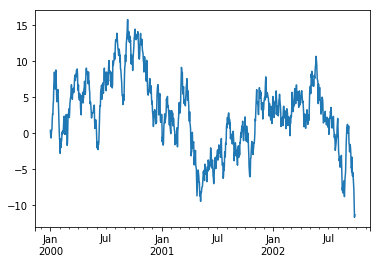

In [137]:
ts.plot()

In [138]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [139]:
df = df.cumsum()

In [140]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

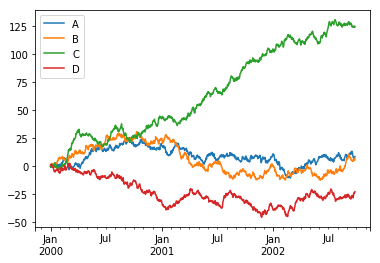

In [141]:
df.plot()

No handles with labels found to put in legend.


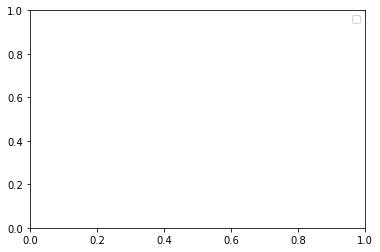

In [142]:
plt.legend(loc='best')

# Getting Data In/Out

## CSV

In [143]:
df.to_csv('foo.csv')

In [144]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.321959,-0.252442,-0.482794,0.977339
1,2000-01-02,-1.200171,-0.073190,-0.131787,1.657528
2,2000-01-03,-0.046417,0.088926,0.336285,1.505045
3,2000-01-04,1.192040,0.717110,1.092086,0.841506
4,2000-01-05,0.254241,2.352198,0.293109,1.317753
5,2000-01-06,-0.393932,2.293192,1.436683,0.387336
6,2000-01-07,1.627069,1.153545,0.861708,0.116785
7,2000-01-08,0.344448,2.092354,-0.978943,-0.975875
8,2000-01-09,0.285273,1.048395,-0.650420,-0.778165
9,2000-01-10,0.501596,-0.356479,-0.757179,-1.340628


## HDF5

In [145]:
df.to_hdf('foo.h5', 'df')

In [146]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.321959,-0.252442,-0.482794,0.977339
2000-01-02,-1.200171,-0.073190,-0.131787,1.657528
2000-01-03,-0.046417,0.088926,0.336285,1.505045
2000-01-04,1.192040,0.717110,1.092086,0.841506
2000-01-05,0.254241,2.352198,0.293109,1.317753
2000-01-06,-0.393932,2.293192,1.436683,0.387336
2000-01-07,1.627069,1.153545,0.861708,0.116785
2000-01-08,0.344448,2.092354,-0.978943,-0.975875
2000-01-09,0.285273,1.048395,-0.650420,-0.778165
2000-01-10,0.501596,-0.356479,-0.757179,-1.340628


## Excel

In [147]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [148]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.321959,-0.252442,-0.482794,0.977339
2000-01-02,-1.200171,-0.073190,-0.131787,1.657528
2000-01-03,-0.046417,0.088926,0.336285,1.505045
2000-01-04,1.192040,0.717110,1.092086,0.841506
2000-01-05,0.254241,2.352198,0.293109,1.317753
2000-01-06,-0.393932,2.293192,1.436683,0.387336
2000-01-07,1.627069,1.153545,0.861708,0.116785
2000-01-08,0.344448,2.092354,-0.978943,-0.975875
2000-01-09,0.285273,1.048395,-0.650420,-0.778165
2000-01-10,0.501596,-0.356479,-0.757179,-1.340628


# Gotcha

In [149]:
if pd.Series([False, True, False]):
    print('I was true')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().